# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
        

In [12]:
bank_df = pd.read_csv('Bank_Customer_Retirement.csv')

In [13]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [8]:
bank_df.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [14]:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [15]:
bank_df.shape

(500, 4)

In [16]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [17]:
bank_df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/abuzaid/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/abuzaid/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/abuzaid/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas

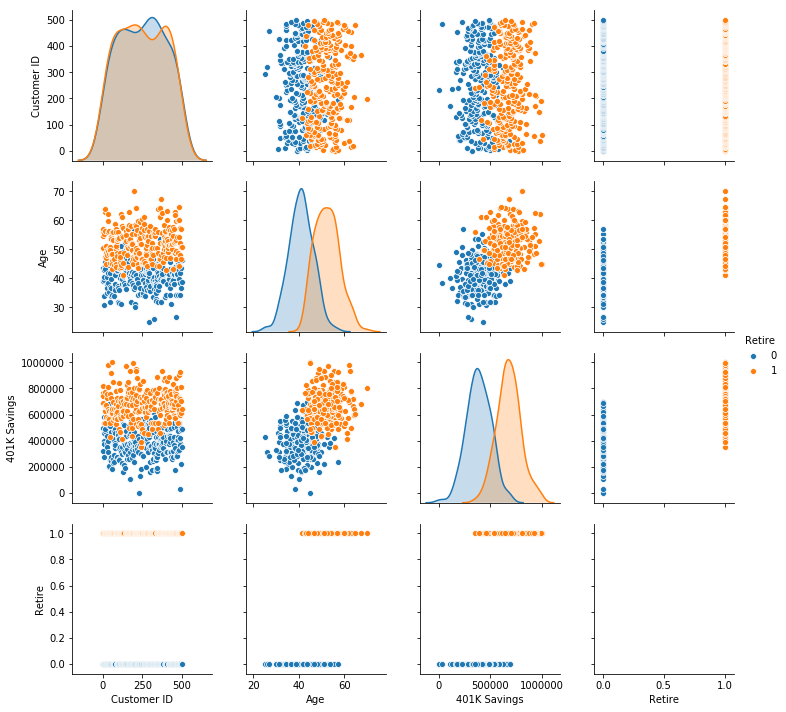

In [19]:
sns.pairplot(bank_df,hue='Retire')

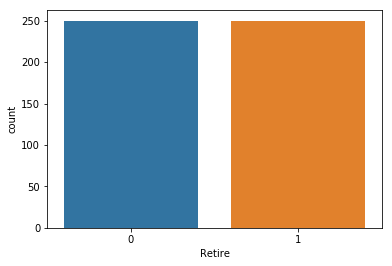

In [22]:
sns.countplot(x='Retire',data= bank_df)

# STEP #4: MODEL TRAINING 

In [23]:
bank_df = bank_df.drop(['Customer ID'],axis=1)

In [27]:

# Let's drop the target label coloumns
X = bank_df.drop(['Retire'],axis=1)
y=bank_df['Retire']

In [25]:
X

,Age,401K Savings
0,39.180417,322349.87400
1,56.101686,768671.57400
2,57.023043,821505.47180
3,43.711358,494187.48500
4,54.728823,691435.77230
5,50.499789,742398.90680
6,39.573302,578650.31560
7,55.159309,533821.20110
8,30.791271,459592.40840
9,40.456073,396800.25090


In [28]:
y

0      0
1      1
2      1
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    1
476    1
477    0
478    0
479    1
480    1
481    1
482    0
483    1
484    1
485    0
486    0
487    0
488    1
489    0
490    1
491    1
492    0
493    1
494    0
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [33]:
X.shape

(500, 2)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [36]:
y_train.shape

(335,)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# STEP #5: EVALUATING THE MODEL

In [41]:
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

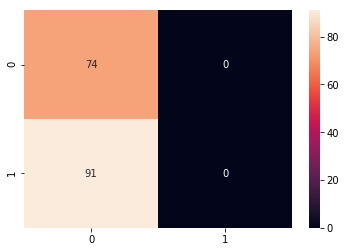

In [42]:
sns.heatmap(cm,annot=True)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        74
           1       0.00      0.00      0.00        91

   micro avg       0.45      0.45      0.45       165
   macro avg       0.22      0.50      0.31       165
weighted avg       0.20      0.45      0.28       165



/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# STEP #6: IMPROVING THE MODEL

In [45]:
X_min = X_train.min()
X_min

Age             25.0
401K Savings    10.0
dtype: float64

In [46]:
range_train = (X_train-X_min).max()
range_train

Age                 45.0
401K Savings    999990.0
dtype: float64

In [47]:
X_train_scaled = (X_train-X_min)/range_train

In [48]:
X_train_scaled

,Age,401K Savings
471,0.362944,0.508584
26,0.289787,0.382825
7,0.670207,0.533817
453,0.842960,0.782768
108,0.410290,0.597858
37,0.825242,0.980549
157,0.564363,0.787806
489,0.508234,0.368469
118,0.438182,0.576924
114,0.362131,0.569368


In [49]:
y

0      0
1      1
2      1
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    1
476    1
477    0
478    0
479    1
480    1
481    1
482    0
483    1
484    1
485    0
486    0
487    0
488    1
489    0
490    1
491    1
492    0
493    1
494    0
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

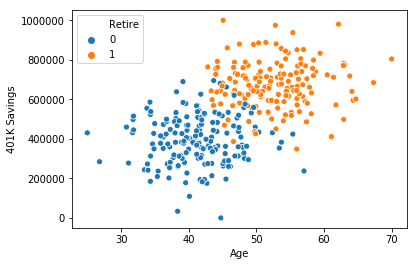

In [60]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)

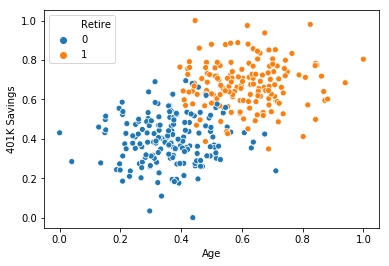

In [61]:
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [63]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [62]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
y_predict_scaled = svc_model.predict(X_test_scaled)

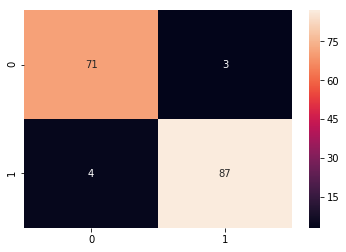

In [65]:
cm = confusion_matrix(y_test,y_predict_scaled)
sns.heatmap(cm,annot=True)

In [66]:
print(classification_report(y_test,y_predict_scaled))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.97      0.96      0.96        91

   micro avg       0.96      0.96      0.96       165
   macro avg       0.96      0.96      0.96       165
weighted avg       0.96      0.96      0.96       165



# IMPROVING THE MODEL - PART 2

In [67]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [68]:
from sklearn.model_selection import GridSearchCV 

In [69]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [70]:
grid.fit(X_train_scaled,y_train)

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.9375, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9464285714285714, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9369369369369369, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5267857142857143, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5267857142857143, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5225225225225225, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [72]:
grid.best_params_
grid.best_estimator_


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
grid_predictions = grid.predict(X_test_scaled)

In [77]:
cm1 = confusion_matrix(y_test, grid_predictions)

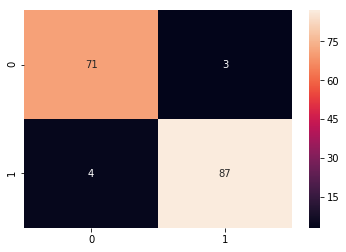

In [78]:
sns.heatmap(cm1,annot=True)

In [79]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.97      0.96      0.96        91

   micro avg       0.96      0.96      0.96       165
   macro avg       0.96      0.96      0.96       165
weighted avg       0.96      0.96      0.96       165



# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!